# 互评作业1: 数据探索性分析与数据预处理

程序所在代码仓库地址：[Github](https://github.com/ZhangYHe/BIT-DataMining-2024)

## 1.要求

### 1.1. 问题描述

本次作业中，自行选择2个数据集进行探索性分析与预处理。

### 1.2. 数据集

可选数据集包括：

- GitHub Dataset
- MovieLens 10M Dataset
- Alzheimer Disease and Healthy Aging Data in US
- Movies Dataset from Pirated Sites
- VitalDB
- Tweet Sentiment's Impact on Stock Returns

### 1.3. 数据分析要求

#### 1.3.1 数据摘要和可视化

- 数据摘要
  
  - 标称属性，给出每个可能取值的频数
  
  - 数值属性，给出5数概括及缺失值的个数

- 数据可视化
  
  - 使用直方图、盒图等检查数据分布及离群点
  
#### 1.3.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值
  
注意：在处理后完成，要对比新旧数据集的差异。

### 1.4 提交内容

- 分析过程报告（PDF格式）
- 程序所在代码仓库地址（使用Github或码云），仓库中应包含完整的处理数据的代码和使用说明
- 所选择的数据集在仓库的README文件中说明
- 相关的数据文件不要上传到代码仓库中

建议：使用Jupyter Notebook将分析报告和代码组织在一起，使用Notebook的导出功能将报告导出为PDF格式的文件上传到乐学。

## 2 GitHub Dataset

数据集为[github dataset](https://www.kaggle.com/datasets/nikhil25803/github-dataset/data)

In [587]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

### 2.1 加载数据集

In [588]:
def check_dataset(dataset_path):

    if not os.path.exists(dataset_path):
        print("[!] dataset not exist")
    else:
        print("[!] dataset already exists")


github_data_path = '../data/github_dataset/archive'
check_dataset(github_data_path)

df = pd.read_csv(github_data_path + "/github_dataset.csv")
print("[!] load dataset")

df.head()

[!] dataset already exists
[!] load dataset


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [589]:
print("columns:\n",df.columns, "\n")
print(df.info())

columns:
 Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       907 non-null    object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB
None


### 2.2.1 数据摘要

In [590]:
print('属性类别数:', len(df.columns))
print('总行数:', len(df), "\n")

属性类别数: 7
总行数: 1052 



对于标称属性，给出每个可能取值的频数

In [591]:
def nominal_frequency(data, nominal_attrs):
    frequencies = {}
    for col in nominal_attrs:
        frequencies[col] = data[col].value_counts()
    return frequencies

nominal_attributes = nominal_attributes = ['repositories', 'language']  
nominal_frequencies = nominal_frequency(df, nominal_attributes)


for attr, freq in nominal_frequencies.items():
    print(f"Attribute: {attr}")
    print(freq)
    print("\n")

Attribute: repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64


Attribute: language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift               

对于数值属性，给出5数概括及缺失值的个数

In [592]:
def numeric_summary(data, numeric_attrs):
    summary = {}
    for col in numeric_attrs:
        summary[col] = {
            'min': data[col].min(),
            'q1': data[col].quantile(0.25),
            'median': data[col].median(),
            'q3': data[col].quantile(0.75),
            'max': data[col].max(),
            'missing_values': data[col].isnull().sum()
        }
    return summary

numeric_attributes = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']


numeric_summaries = numeric_summary(df, numeric_attributes)
for attr, summary in numeric_summaries.items():
    print(f"Attribute: {attr}")
    print("Min:", summary['min'])
    print("Q1:", summary['q1'])
    print("Median:", summary['median'])
    print("Q3:", summary['q3'])
    print("Max:", summary['max'])
    print("Missing Values:", summary['missing_values'])
    print("\n")


Attribute: stars_count
Min: 0
Q1: 1.0
Median: 12.0
Q3: 65.25
Max: 995
Missing Values: 0


Attribute: forks_count
Min: 0
Q1: 1.0
Median: 6.0
Q3: 38.25
Max: 973
Missing Values: 0


Attribute: issues_count
Min: 1
Q1: 1.0
Median: 2.0
Q3: 6.0
Max: 612
Missing Values: 0


Attribute: pull_requests
Min: 0
Q1: 0.0
Median: 0.0
Q3: 2.0
Max: 567
Missing Values: 0


Attribute: contributors
Min: 0
Q1: 0.0
Median: 2.0
Q3: 4.0
Max: 658
Missing Values: 0




### 2.2.2 数据可视化
  
使用直方图、盒图等检查数据分布及离群点

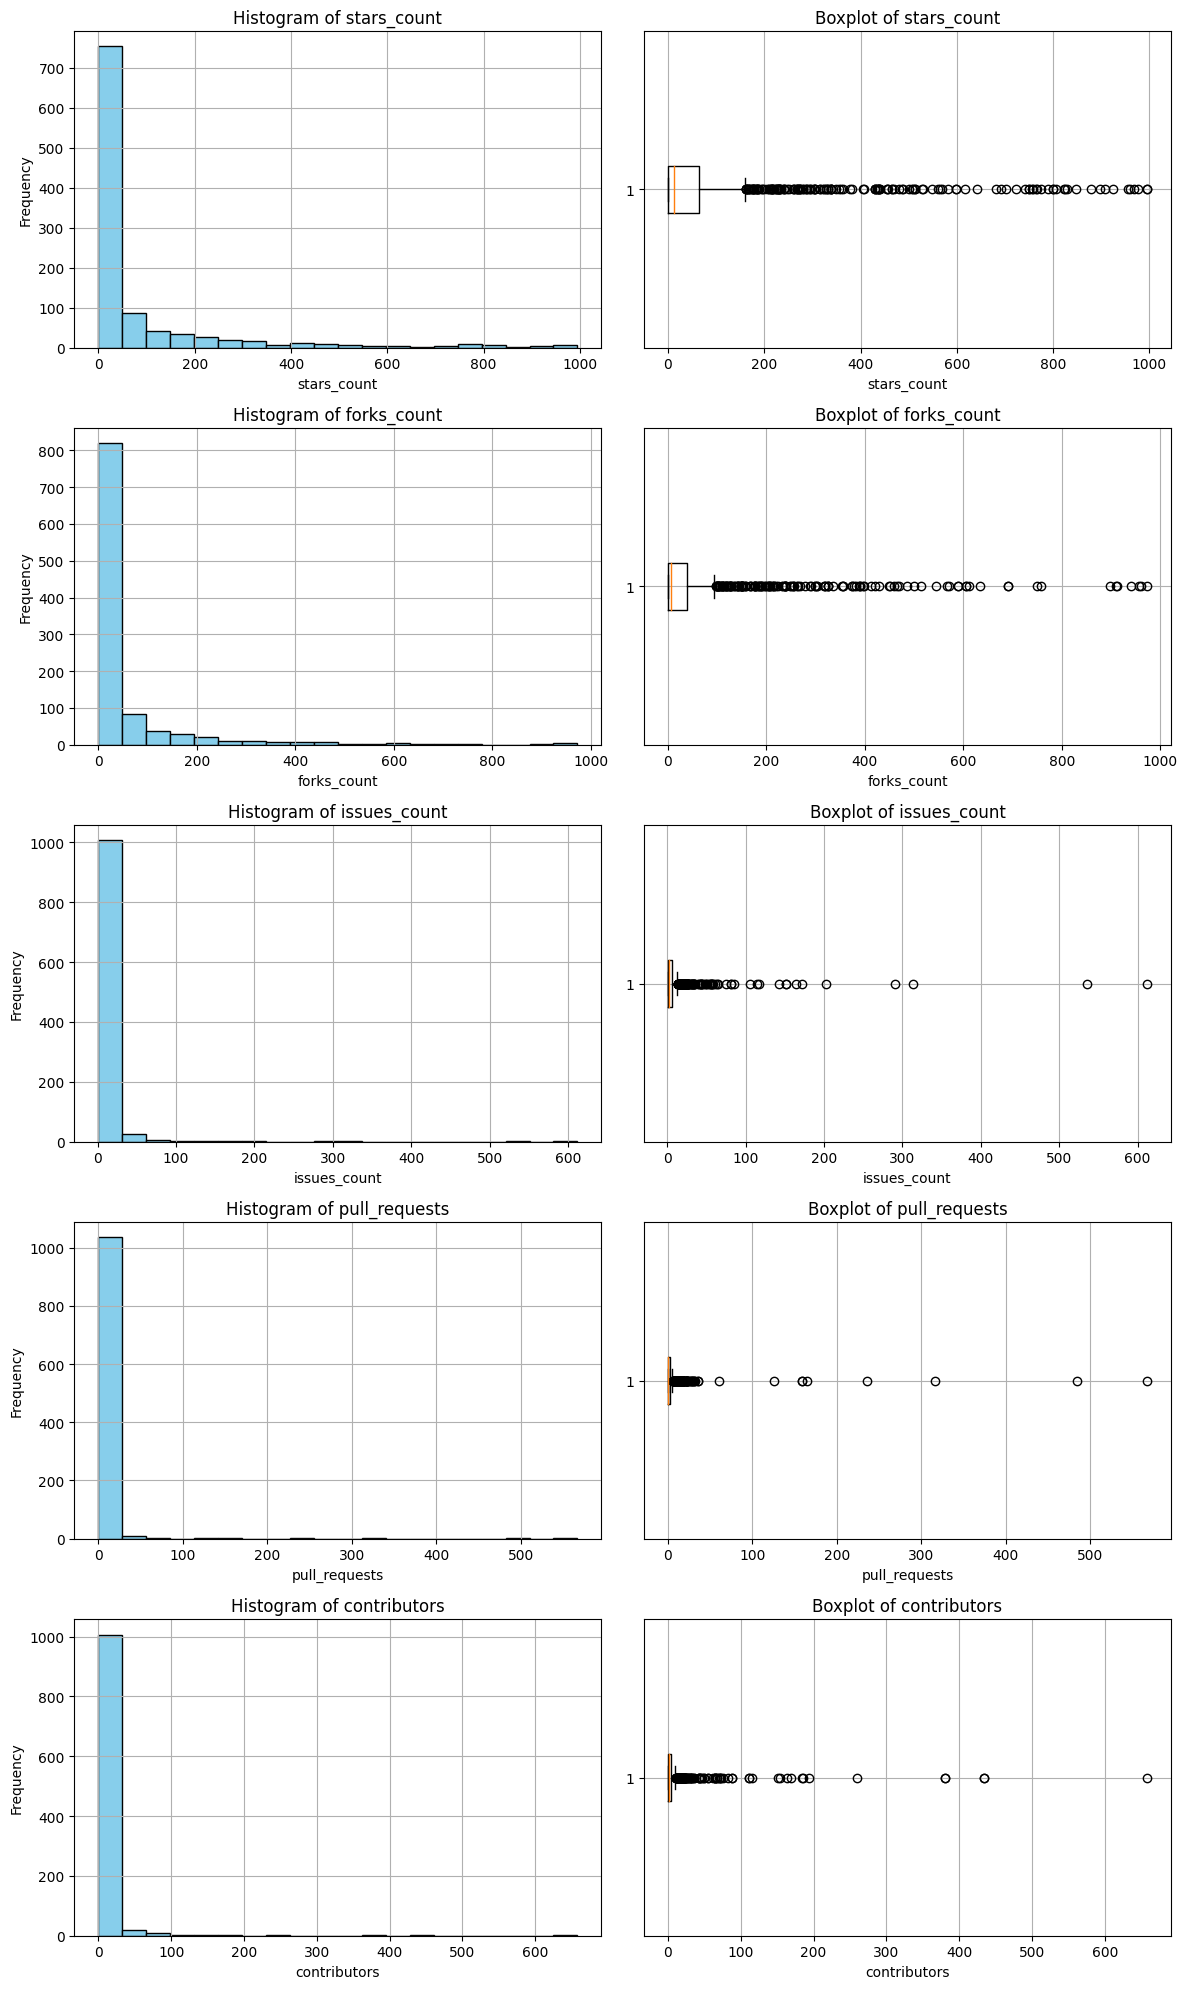

In [593]:
fig, axs = plt.subplots(len(numeric_attributes), 2, figsize=(12, 20))

for i, attr in enumerate(numeric_attributes):
    axs[i, 0].hist(df[attr].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Histogram of {attr}')
    axs[i, 0].set_xlabel(attr)
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].grid(True)
    
    axs[i, 1].boxplot(df[attr].dropna(), vert=False)
    axs[i, 1].set_title(f'Boxplot of {attr}')
    axs[i, 1].set_xlabel(attr)
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

以"language"属性为例，绘制直方图检查数据分布，可以看出出现频率最高的为JavaScript

<AxesSubplot:>

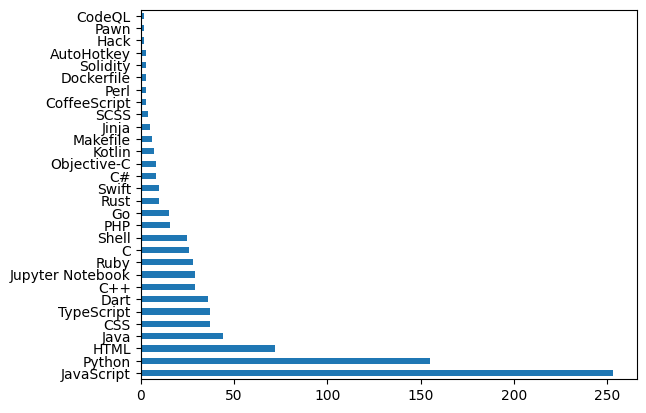

In [594]:
df["language"].value_counts().head(30).plot.barh()

绘制Q-Q图并检查数据分布和离群点。

使用Shapiro-Wilk 检验数据是否符合正态分布，如果 p-value 大于 0.05，则表示数据符合正态分布。

根据图表和数据可知，该数据集中所有数值属性都不符合正态分布且都存在离群点。

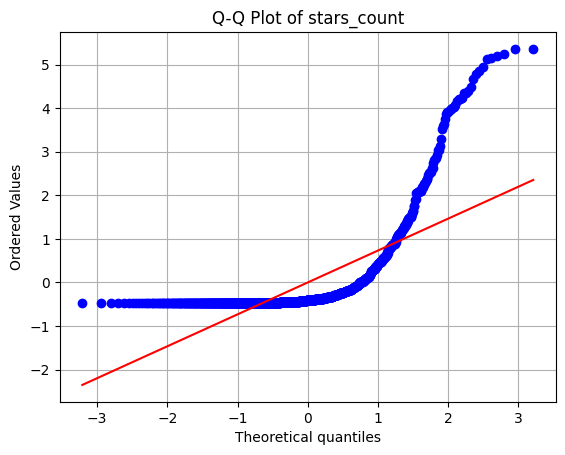

Attribute: stars_count
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




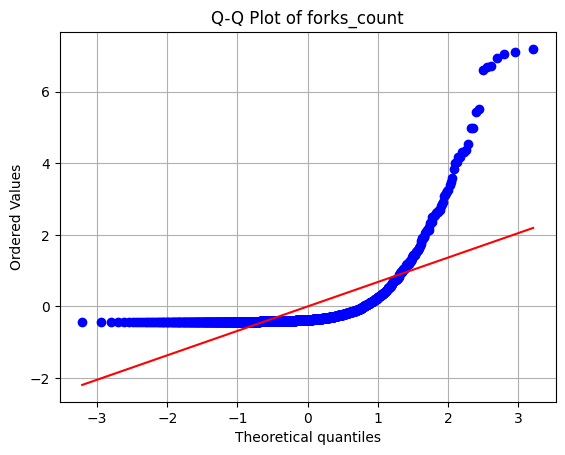

Attribute: forks_count
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




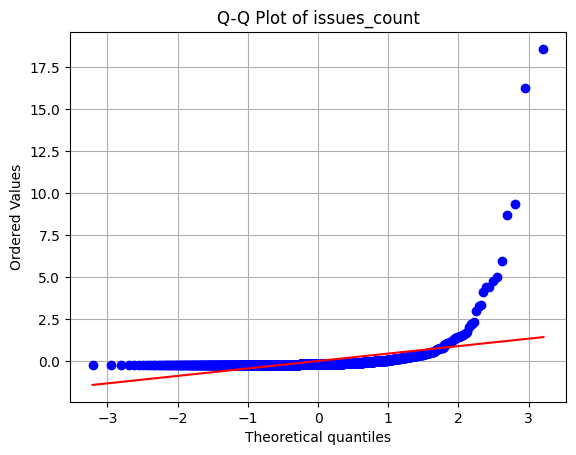

Attribute: issues_count
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




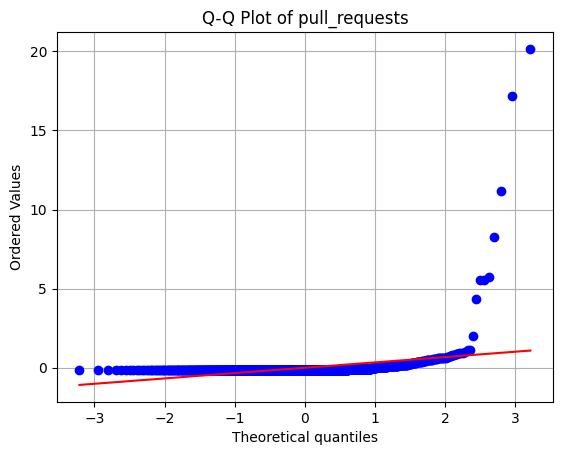

Attribute: pull_requests
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




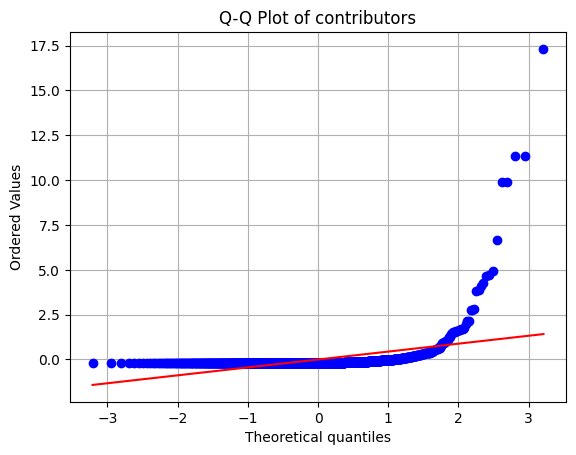

Attribute: contributors
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




In [595]:
for attr in numeric_attributes:
    data = df[attr].dropna()
    
    z_scores = (data - data.mean()) / data.std()

    stats.probplot(z_scores, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {attr}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()

    # 判断离群点是否符合正态分布
    print(f"Attribute: {attr}")
   
    outliers = z_scores[(z_scores > 3) | (z_scores < -3)]
    if len(outliers) > 0:
        print("There are outliers.")
    else:
        print("There are no outliers.")
    print("Normality Test (Shapiro-Wilk):")
    _, p_value = stats.shapiro(data)
    if p_value > 0.05:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")
    print("\n")

### 2.3 数据缺失的处理

根据结果可知，只有"language"属性有缺失数据。

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值
  
注意：在处理后完成，要对比新旧数据集的差异。

In [596]:
def check_missing_data(data, numeric_attrs, nominal_attrs):
    missing_data = {}

    for attr in numeric_attrs:
        missing_count = data[attr].isnull().sum()
        if missing_count > 0:
            missing_data[attr] = missing_count
            print(f"Attribute: {attr}, Missing Count: {missing_count}")
        else:
            print(f"Attribute: {attr} don't have missing data")

    for attr in nominal_attrs:
        missing_count = data[attr].isnull().sum()
        if missing_count > 0:
            missing_data[attr] = missing_count
            print(f"Attribute: {attr}, Missing Count: {missing_count}")
        else:
            print(f"Attribute: {attr} don't have missing data")

    return missing_data

missing_data = check_missing_data(df, numeric_attributes, nominal_attributes)


Attribute: stars_count don't have missing data
Attribute: forks_count don't have missing data
Attribute: issues_count don't have missing data
Attribute: pull_requests don't have missing data
Attribute: contributors don't have missing data
Attribute: repositories don't have missing data
Attribute: language, Missing Count: 145


#### 2.3.1 将缺失部分剔除

使用将缺失部分剔除策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

In [597]:
def remove_missing_data(data, attribute):
    new_data = data.copy()

    new_data = new_data.dropna(subset=[attribute])
    
    return new_data

missing_attribute = 'language'
new_df = remove_missing_data(df, missing_attribute)
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [598]:

new_df.head()


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python


对比删除前后数据集中记录条数，使用柱状图直观的比较前后差异。


Number of rows in old dataset: 1052
Number of rows in new dataset: 907


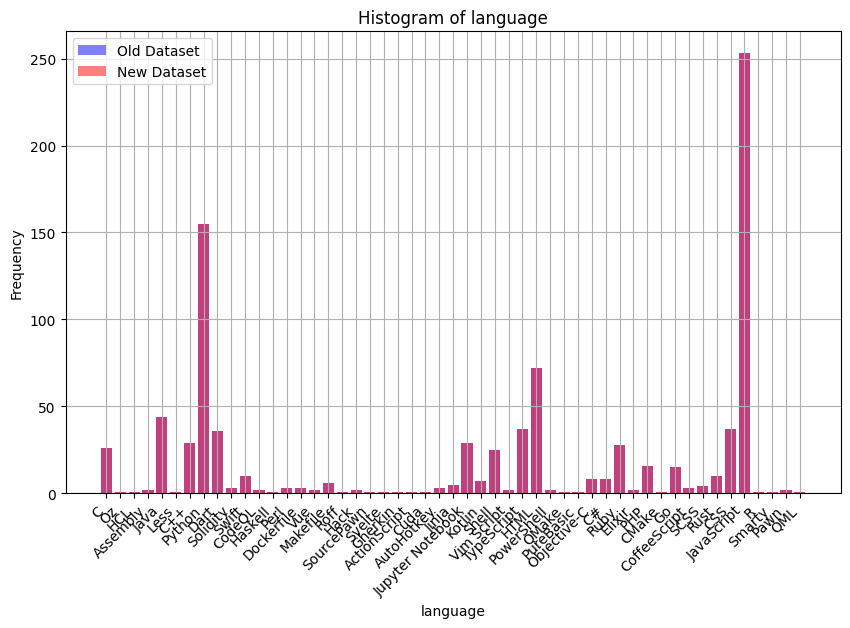

In [599]:

print(f"\nNumber of rows in old dataset: {len(df)}")
print(f"Number of rows in new dataset: {len(new_df)}")

def compare_histograms(old_data, new_data, attribute):

    old_counts = old_data[attribute].value_counts()
    new_counts = new_data[attribute].value_counts()
    all_values = list(set(old_counts.index) | set(new_counts.index))
    
    plt.figure(figsize=(10, 6))
    plt.bar(all_values, old_counts.reindex(all_values, fill_value=0), color='blue', alpha=0.5, label='Old Dataset')
    plt.bar(all_values, new_counts.reindex(all_values, fill_value=0), color='red', alpha=0.5, label='New Dataset')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_histograms(df, new_df, 'language')


In [600]:
new_df.isna().sum()

repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

#### 2.3.2 用最高频率值来填补

使用最高频率值来填补缺失值策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

最高频率值为JavaScript

In [601]:
def fill_missing_with_mode(data, attribute):
    new_data = data.copy()

    mode_value = new_data[attribute].mode()[0]
    print(f'{mode_value} is the language with the highest frequency.\n')
    
    new_data[attribute].fillna(mode_value, inplace=True)
    
    return new_data

new_df = fill_missing_with_mode(df, missing_attribute)



JavaScript is the language with the highest frequency.



In [602]:
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [603]:
new_df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby



Number of rows in old dataset: 1052
Number of rows in new dataset: 1052

Differences between old and new datasets:
145


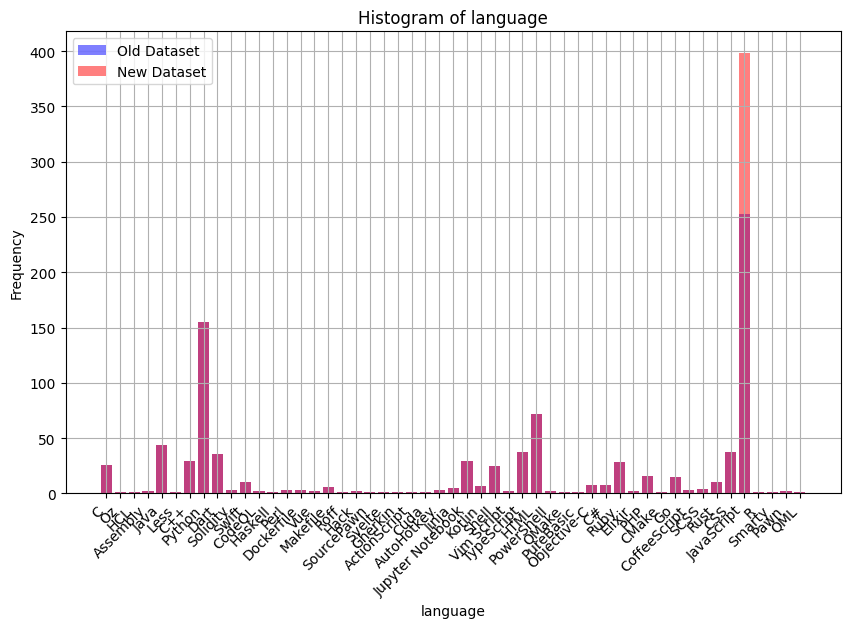

In [604]:
print(f"\nNumber of rows in old dataset: {len(df)}")
print(f"Number of rows in new dataset: {len(new_df)}")

print("\nDifferences between old and new datasets:")
print((df[missing_attribute] != new_df[missing_attribute]).sum())

compare_histograms(df, new_df, 'language')

#### 2.3.3 通过属性的相关关系来填补

通过属性的相关关系来填补缺失值策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

由于该数据集中只有"language"和"repositories"两个属性为标称值，所以使用"repositories"来填补缺失值。

In [606]:
def fill_missing_with_related_attribute(data, missing_attribute, related_attribute):
    new_data = data.copy()

    # 计算相关属性的众数值
    related_mode_value = new_data[related_attribute].mode()[0]
    
    new_data[missing_attribute].fillna(related_mode_value, inplace=True)
    
    return new_data

related_attribute = 'repositories'


new_df = fill_missing_with_related_attribute(df, missing_attribute, related_attribute)
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [607]:
new_df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,Anurag5086/MentHealth
1,EddieHubCommunity/support,271,150,536,6,71,Anurag5086/MentHealth
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby



Differences between old and new datasets:
145


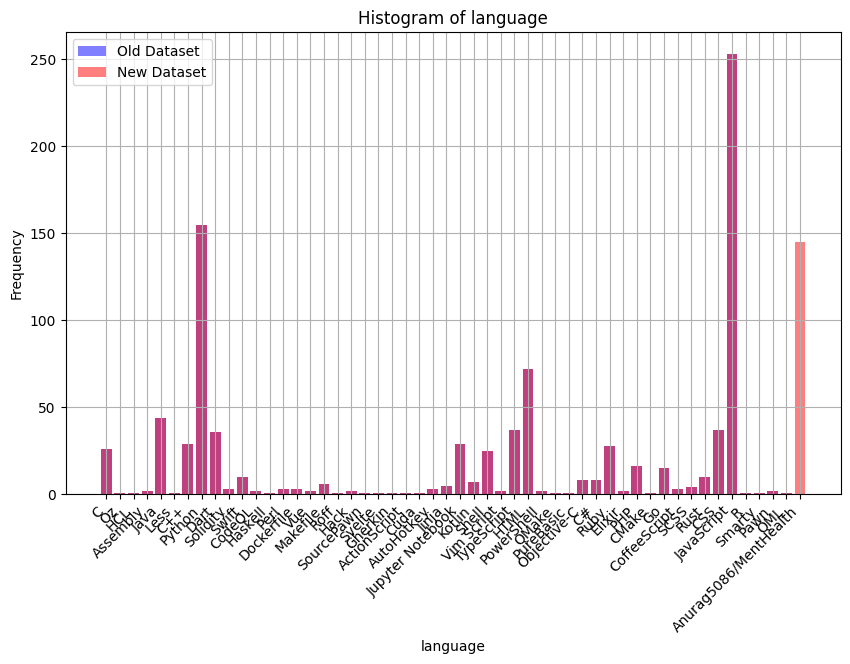

In [608]:

print("\nDifferences between old and new datasets:")
print((df[missing_attribute] != new_df[missing_attribute]).sum())

compare_histograms(df, new_df, 'language')

#### 2.3.4 通过数据对象之间的相似性来填补

通过数据对象之间的相似性来填补缺失值策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

对于每一条缺失数据，计算其与非缺失记录的欧式距离衡量相似度，使用最相似的记录来填补缺失值。

In [609]:
def fill_missing_language(data, missing_attribute, numeric_attributes):

    new_data = data.copy()

    missing_language_records = new_data[new_data[missing_attribute].isna()]
    
    non_missing_language_records = new_data.dropna(subset=[missing_attribute])
    
    filled_data = new_data.copy()
    
    for index, row in missing_language_records.iterrows():
        missing_numeric_values = row[numeric_attributes].values.reshape(1, -1)

        distances = euclidean_distances(missing_numeric_values, non_missing_language_records[numeric_attributes])[0]

        most_similar_index = np.argmin(distances)
        filled_language_value = non_missing_language_records.iloc[most_similar_index][missing_attribute]

        filled_data.at[index, missing_attribute] = filled_language_value
    
    return filled_data

new_df = filled_df = fill_missing_language(df, missing_attribute, numeric_attributes)
df.head()


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [610]:
new_df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,C++
1,EddieHubCommunity/support,271,150,536,6,71,C++
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


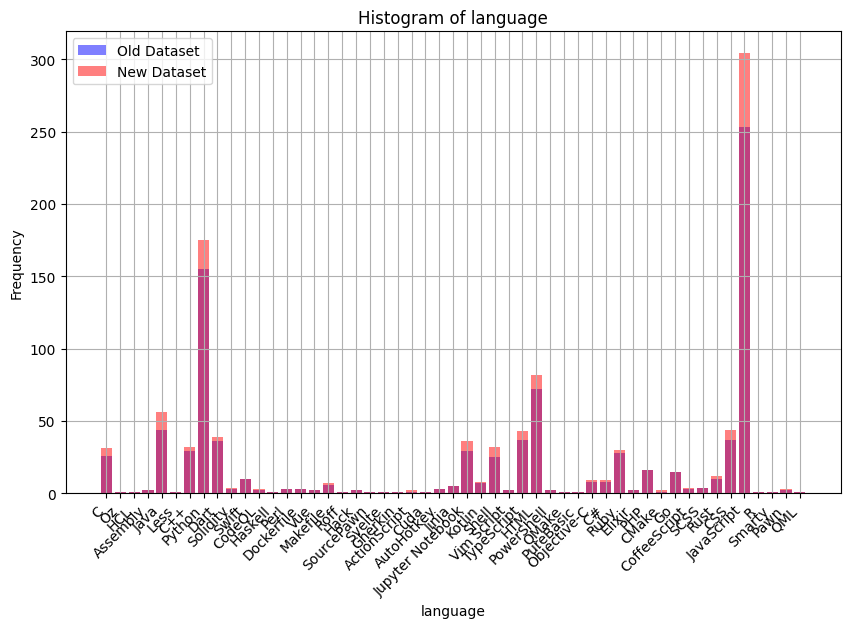

In [611]:
compare_histograms(df, new_df, 'language')


## 3 Tweet Sentiment's Impact on Stock Returns

数据集为[Tweet Sentiment's Impact on Stock Returns](https://www.kaggle.com/datasets/thedevastator/tweet-sentiment-s-impact-on-stock-returns?select=reduced_dataset-release.csv)

### 3.1 加载数据集

In [612]:
def check_dataset(dataset_path):

    if not os.path.exists(dataset_path):
        print("[!] dataset not exist")
    else:
        print("[!] dataset already exists")


github_data_path = '../data/TSISR/archive'
check_dataset(github_data_path)

df = pd.read_csv(github_data_path + "/reduced_dataset-release.csv")
print("[!] load dataset")

df.head()

[!] dataset already exists
[!] load dataset


/Users/zhangyunhe/anaconda3/envs/ML/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [613]:
print("columns:\n",df.columns, "\n")
print(df.info())

columns:
 Index(['Unnamed: 0', 'TWEET', 'STOCK', 'DATE', 'LAST_PRICE', '1_DAY_RETURN',
       '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'PX_VOLUME',
       'VOLATILITY_10D', 'VOLATILITY_30D', 'LSTM_POLARITY',
       'TEXTBLOB_POLARITY', 'MENTION'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D   

### 3.2.1 数据摘要

In [614]:
print('属性类别数:', len(df.columns))
print('总行数:', len(df), "\n")

属性类别数: 15
总行数: 143282 



对于标称属性，给出每个可能取值的频数

In [615]:
def nominal_frequency(data, nominal_attrs):
    frequencies = {}
    for col in nominal_attrs:
        frequencies[col] = data[col].value_counts()
    return frequencies

nominal_attributes = nominal_attributes = ['Unnamed: 0', 'TWEET', 'STOCK', 'DATE', 'LSTM_POLARITY', 'TEXTBLOB_POLARITY', 'MENTION']  
nominal_frequencies = nominal_frequency(df, nominal_attributes)


for attr, freq in nominal_frequencies.items():
    print(f"Attribute: {attr}")
    print(freq)
    print("\n")

Attribute: Unnamed: 0
Nike       8224
eBay       7022
Reuters    3618
Netflix    3548
Apple      2117
           ... 
28392         1
28391         1
28390         1
28389         1
862071        1
Name: Unnamed: 0, Length: 85278, dtype: int64


Attribute: TWEET
eBay                                                                                                                                              3726
04/09/2018                                                                                                                                        3467
05/09/2018                                                                                                                                        2525
Reuters                                                                                                                                           2093
06/09/2018                                                                                                                           

对于数值属性，给出5数概括及缺失值的个数

In [616]:
def numeric_summary(data, numeric_attrs):
    summary = {}
    for col in numeric_attrs:
        summary[col] = {
            'min': data[col].min(),
            'q1': data[col].quantile(0.25),
            'median': data[col].median(),
            'q3': data[col].quantile(0.75),
            'max': data[col].max(),
            'missing_values': data[col].isnull().sum()
        }
    return summary

numeric_attributes = ['LAST_PRICE', '1_DAY_RETURN','2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D']


numeric_summaries = numeric_summary(df, numeric_attributes)
for attr, summary in numeric_summaries.items():
    print(f"Attribute: {attr}")
    print("Min:", summary['min'])
    print("Q1:", summary['q1'])
    print("Median:", summary['median'])
    print("Q3:", summary['q3'])
    print("Max:", summary['max'])
    print("Missing Values:", summary['missing_values'])
    print("\n")


Attribute: LAST_PRICE
Min: -0.1735537190082644
Q1: -0.0004139072847681
Median: 0.0099706744868034
Q3: 49.9725
Max: 165500.0
Missing Values: 58106


Attribute: 1_DAY_RETURN
Min: -0.1778512396694214
Q1: -0.0059891383423284
Median: 0.0011188839589404
Q3: 0.0136032611184903
Max: 0.24363885871119
Missing Values: 58106


Attribute: 2_DAY_RETURN
Min: -0.2049586776859504
Q1: -0.009847977204623175
Median: 0.0031618281115262
Q3: 0.022653721682847825
Max: 0.2671133119720361
Missing Values: 58106


Attribute: 3_DAY_RETURN
Min: -0.1778512396694214
Q1: 0.0
Median: 0.0374371859296482
Q3: 7943443.0
Max: 308106768.0
Missing Values: 58106


Attribute: 7_DAY_RETURN
Min: -0.2049586776859504
Q1: 0.0338680926916221
Median: 20.517
Q3: 52.668
Max: 143947510.0
Missing Values: 58106


Attribute: PX_VOLUME
Min: 1.0
Q1: 17.152
Median: 24.07800000000001
Q3: 2628128.0
Max: 169803668.0
Missing Values: 58106


Attribute: VOLATILITY_10D
Min: -1.0
Q1: 1.0
Median: 9.482
Q3: 20.289
Max: 124.137
Missing Values: 58111


At

### 3.2.2 数据可视化
  
使用直方图、盒图等检查数据分布及离群点

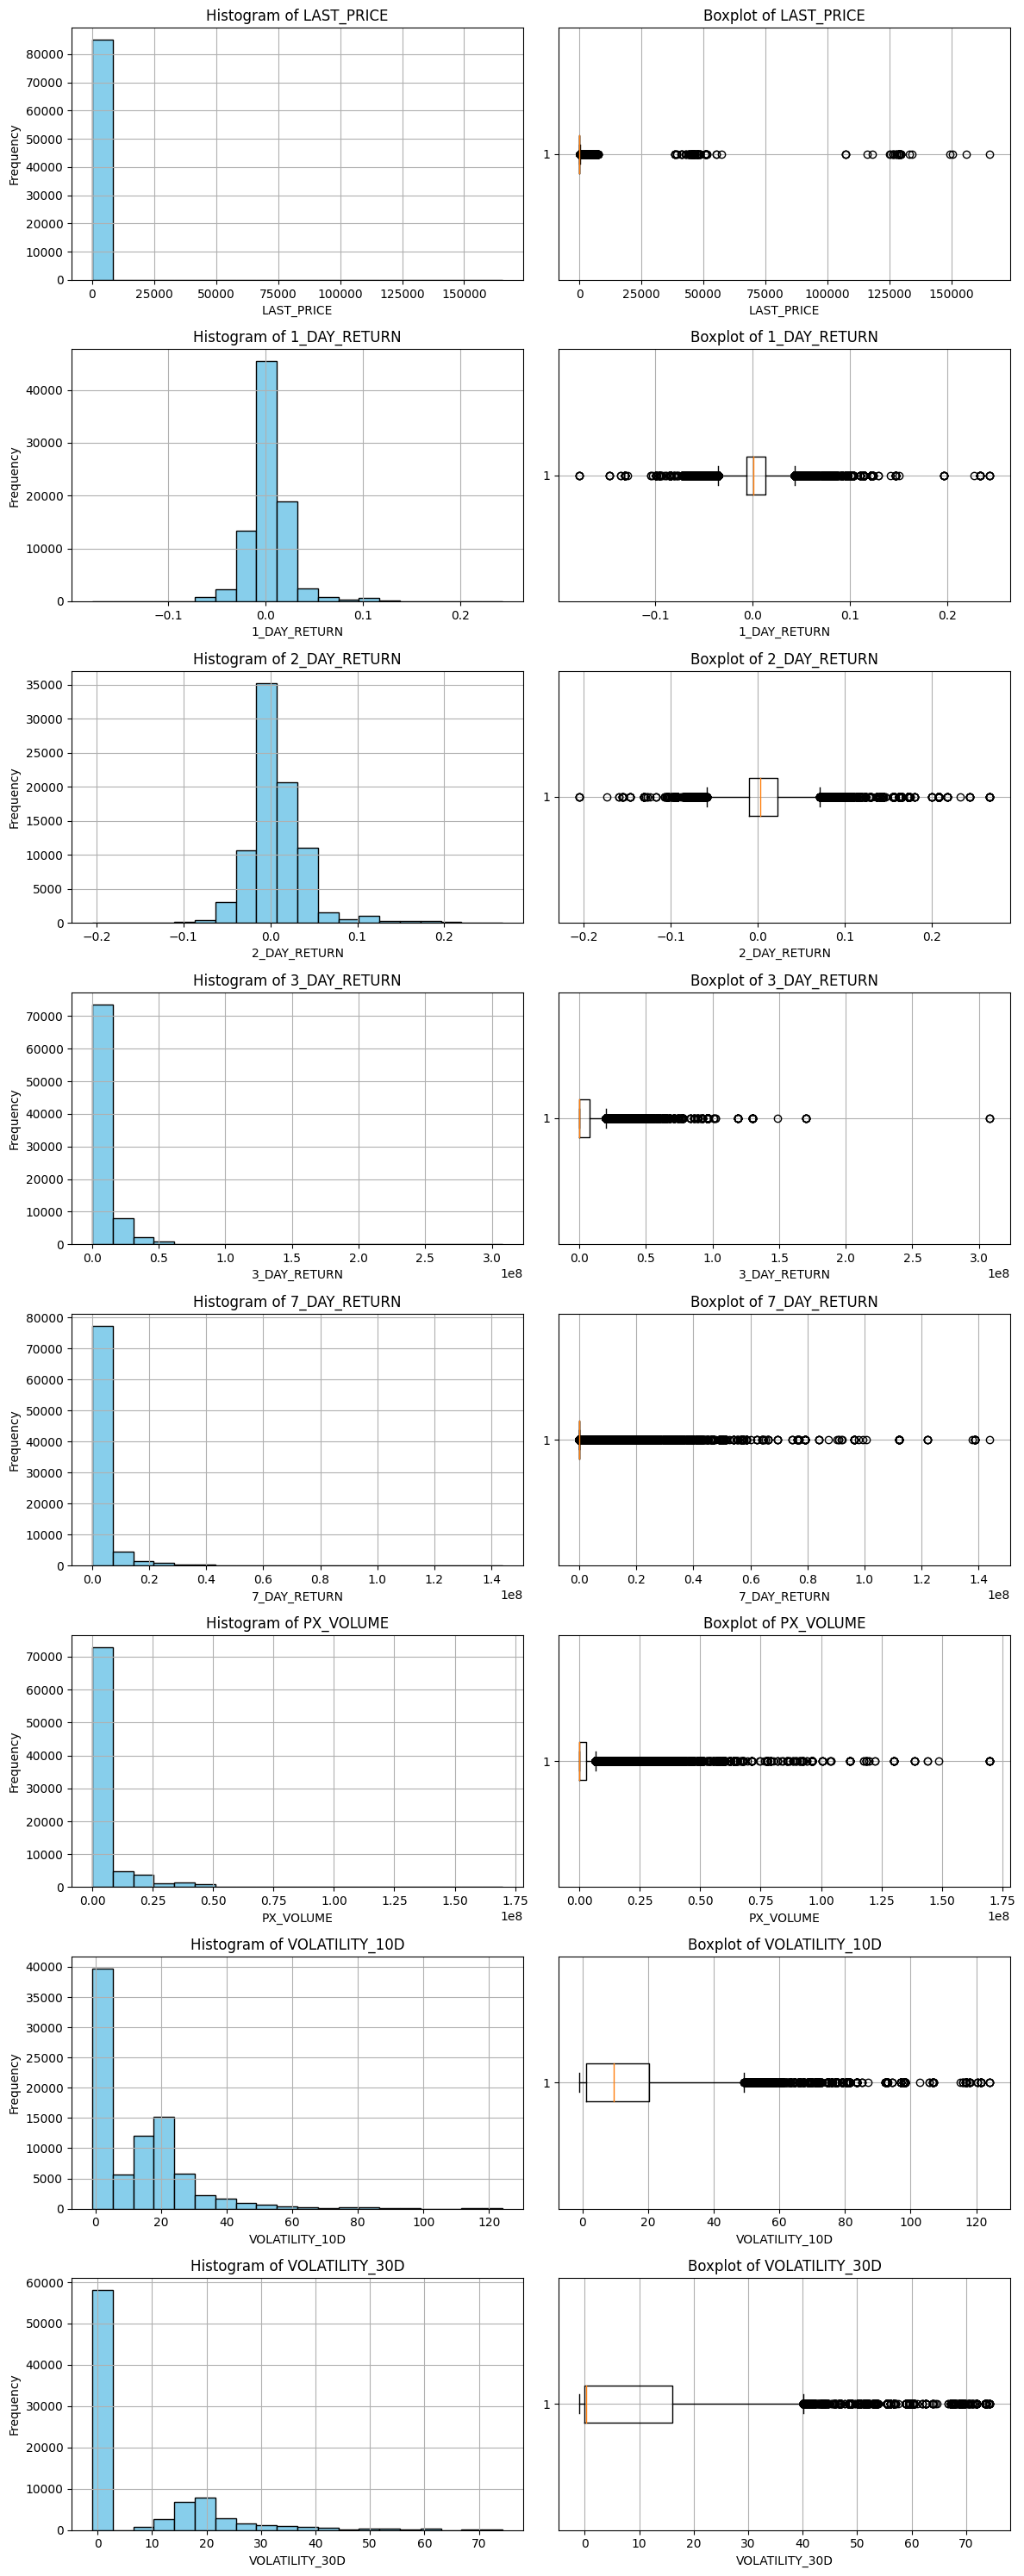

In [617]:
fig, axs = plt.subplots(len(numeric_attributes), 2, figsize=(12, 30))

for i, attr in enumerate(numeric_attributes):
    axs[i, 0].hist(df[attr].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Histogram of {attr}')
    axs[i, 0].set_xlabel(attr)
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].grid(True)
    
    axs[i, 1].boxplot(df[attr].dropna(), vert=False)
    axs[i, 1].set_title(f'Boxplot of {attr}')
    axs[i, 1].set_xlabel(attr)
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

以"Unnamed: 0"和"STOCK"属性为例，绘制直方图检查数据分布

<AxesSubplot:>

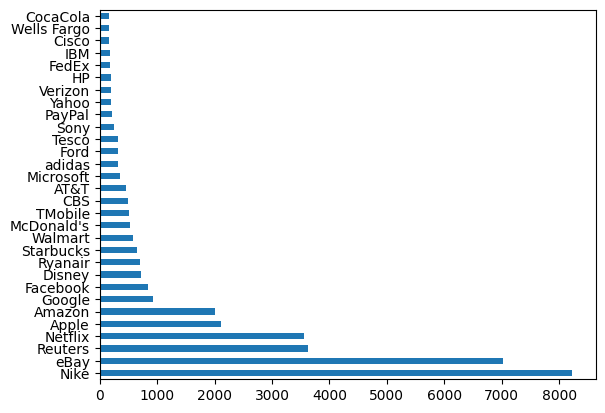

In [618]:
df["Unnamed: 0"].value_counts().head(30).plot.barh()

<AxesSubplot:>

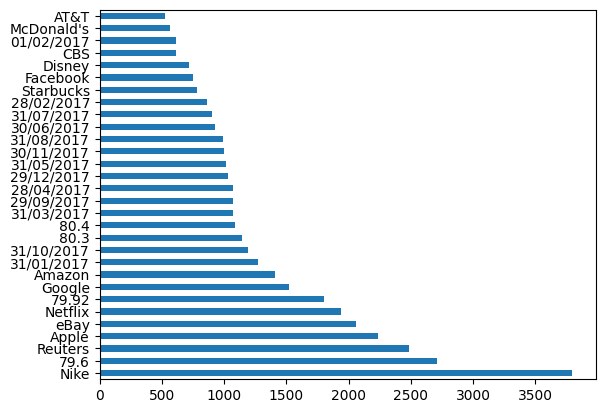

In [619]:
df["STOCK"].value_counts().head(30).plot.barh()

绘制Q-Q图并检查数据分布和离群点

使用Shapiro-Wilk 检验数据是否符合正态分布，如果 p-value 大于 0.05，则表示数据符合正态分布。

根据图表和数据可知，该数据集中所有数值属性都不符合正态分布且都存在离群点

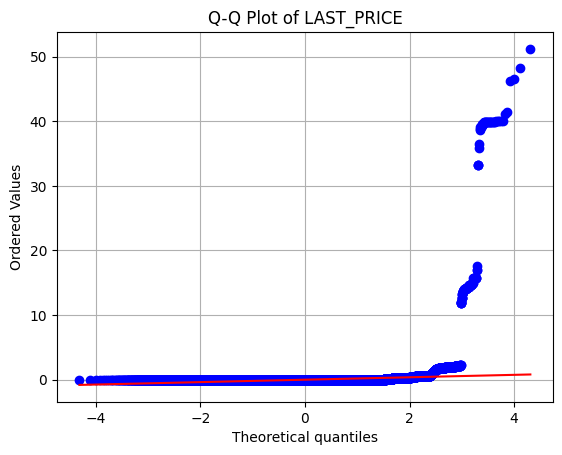

Attribute: LAST_PRICE
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




/Users/zhangyunhe/anaconda3/envs/ML/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


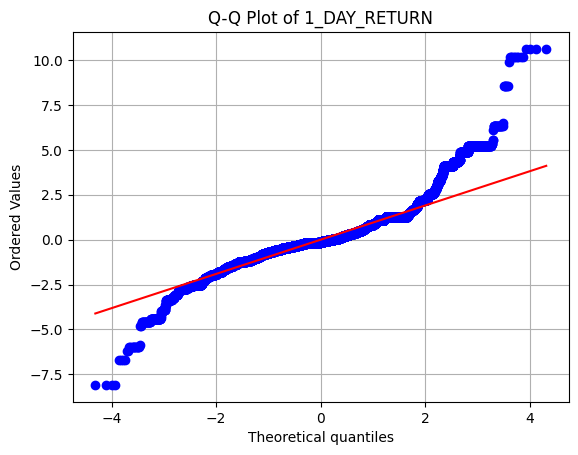

Attribute: 1_DAY_RETURN
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




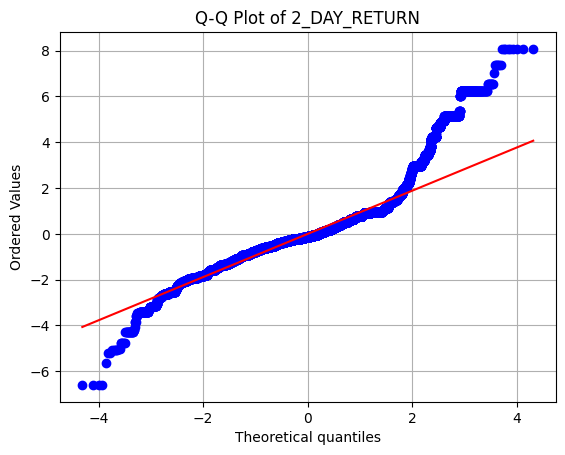

Attribute: 2_DAY_RETURN
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




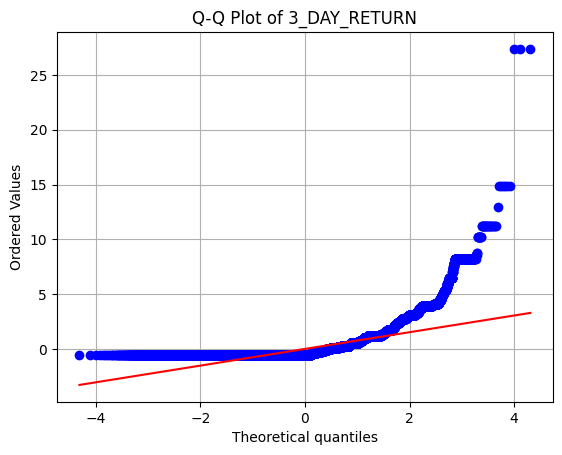

Attribute: 3_DAY_RETURN
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




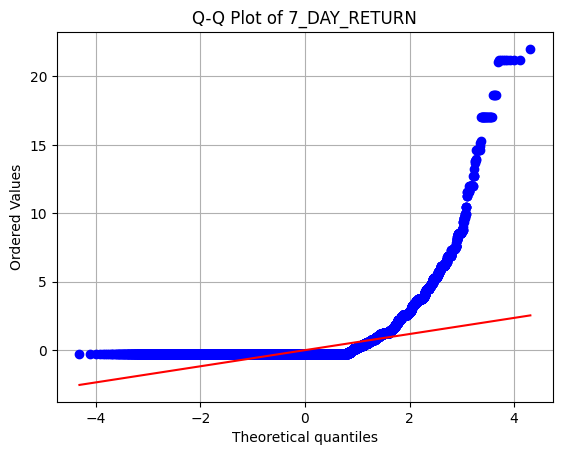

Attribute: 7_DAY_RETURN
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




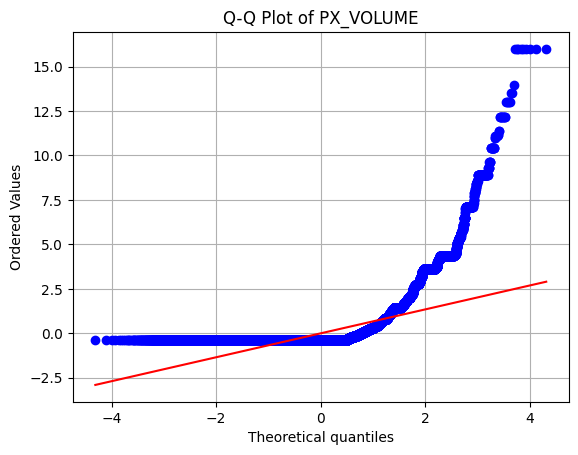

Attribute: PX_VOLUME
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




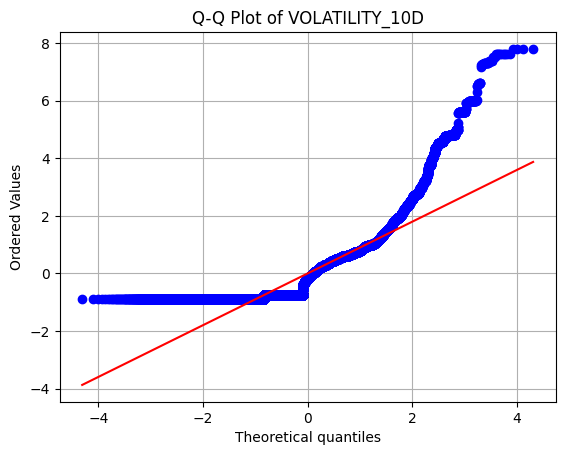

Attribute: VOLATILITY_10D
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




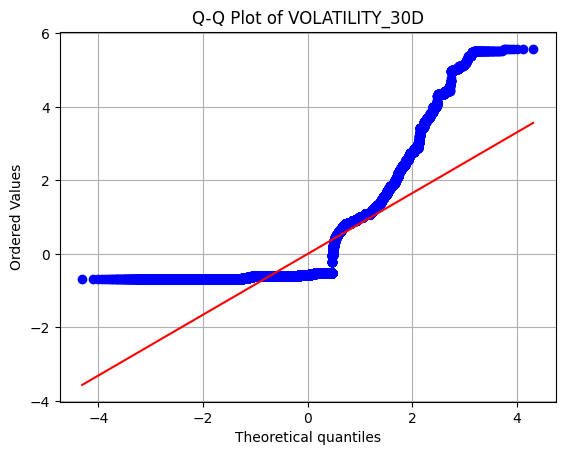

Attribute: VOLATILITY_30D
There are outliers.
Normality Test (Shapiro-Wilk):
The data is not normally distributed.




In [620]:
for attr in numeric_attributes:
    data = df[attr].dropna()
    
    z_scores = (data - data.mean()) / data.std()

    stats.probplot(z_scores, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {attr}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()

    # 判断离群点是否符合正态分布
    print(f"Attribute: {attr}")
   
    outliers = z_scores[(z_scores > 3) | (z_scores < -3)]
    if len(outliers) > 0:
        print("There are outliers.")
    else:
        print("There are no outliers.")
    print("Normality Test (Shapiro-Wilk):")
    _, p_value = stats.shapiro(data)
    if p_value > 0.05:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")
    print("\n")

### 3.3 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值
  
注意：在处理后完成，要对比新旧数据集的差异。

In [621]:
def check_missing_data(data, numeric_attrs, nominal_attrs):
    missing_data = {}

    for attr in numeric_attrs:
        missing_count = data[attr].isnull().sum()
        if missing_count > 0:
            missing_data[attr] = missing_count
            print(f"Attribute: {attr}, Missing Count: {missing_count}")
        else:
            print(f"Attribute: {attr} don't have missing data")

    for attr in nominal_attrs:
        missing_count = data[attr].isnull().sum()
        if missing_count > 0:
            missing_data[attr] = missing_count
            print(f"Attribute: {attr}, Missing Count: {missing_count}")
        else:
            print(f"Attribute: {attr} don't have missing data")

    return missing_data

missing_data = check_missing_data(df, numeric_attributes, nominal_attributes)
missing_list = [attr for attr in missing_data]

print("missing_list : ", missing_list)


Attribute: LAST_PRICE, Missing Count: 58106
Attribute: 1_DAY_RETURN, Missing Count: 58106
Attribute: 2_DAY_RETURN, Missing Count: 58106
Attribute: 3_DAY_RETURN, Missing Count: 58106
Attribute: 7_DAY_RETURN, Missing Count: 58106
Attribute: PX_VOLUME, Missing Count: 58106
Attribute: VOLATILITY_10D, Missing Count: 58111
Attribute: VOLATILITY_30D, Missing Count: 58117
Attribute: Unnamed: 0, Missing Count: 18521
Attribute: TWEET, Missing Count: 3
Attribute: STOCK, Missing Count: 58106
Attribute: DATE, Missing Count: 58106
Attribute: LSTM_POLARITY, Missing Count: 58107
Attribute: TEXTBLOB_POLARITY, Missing Count: 97688
Attribute: MENTION, Missing Count: 116209
missing_list :  ['LAST_PRICE', '1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D', 'Unnamed: 0', 'TWEET', 'STOCK', 'DATE', 'LSTM_POLARITY', 'TEXTBLOB_POLARITY', 'MENTION']


#### 3.3.1 将缺失部分剔除

使用将缺失部分剔除策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

删除后新数据集仅有 27064 条记录。

In [622]:
df.isnull()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143277,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
143278,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
143279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143280,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True


In [623]:
def remove_missing_data(data, missing_list):
    new_data = data.copy()

    for attribute in missing_list:
        new_data = new_data.dropna(subset=[attribute])
    
    return new_data

new_df = remove_missing_data(df, missing_list)
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [624]:
new_df.head()


,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
11,7,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1,0.2,@Starbucks
20,12,@gawker Jamaicans make money with @Payoneer @P...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal


In [625]:

print(f"\nNumber of rows in old dataset: {len(df)}")
print(f"Number of rows in new dataset: {len(new_df)}")




Number of rows in old dataset: 143282
Number of rows in new dataset: 27064


In [626]:
new_df.isnull()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143251,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143252,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143259,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143276,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [627]:
new_df.isna().sum()

Unnamed: 0           0
TWEET                0
STOCK                0
DATE                 0
LAST_PRICE           0
1_DAY_RETURN         0
2_DAY_RETURN         0
3_DAY_RETURN         0
7_DAY_RETURN         0
PX_VOLUME            0
VOLATILITY_10D       0
VOLATILITY_30D       0
LSTM_POLARITY        0
TEXTBLOB_POLARITY    0
MENTION              0
dtype: int64

#### 3.3.2 用最高频率值来填补

使用最高频率值来填补缺失值策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。


In [628]:
def fill_missing_with_mode(data, missing_list):
    new_data = data.copy()

    for attribute in missing_list:
        mode_value = new_data[attribute].mode()[0]
        print(f'{mode_value} is the {attribute} with the highest frequency.\n')

        new_data[attribute].fillna(mode_value, inplace=True)
    
    return new_data

new_df = fill_missing_with_mode(df, missing_list)

0.0 is the LAST_PRICE with the highest frequency.

0.0 is the 1_DAY_RETURN with the highest frequency.

0.0 is the 2_DAY_RETURN with the highest frequency.

18565837.0 is the 3_DAY_RETURN with the highest frequency.

20.517 is the 7_DAY_RETURN with the highest frequency.

20.153 is the PX_VOLUME with the highest frequency.

1.0 is the VOLATILITY_10D with the highest frequency.

0.0 is the VOLATILITY_30D with the highest frequency.

Nike is the Unnamed: 0 with the highest frequency.

eBay is the TWEET with the highest frequency.

Nike is the STOCK with the highest frequency.

0.0 is the DATE with the highest frequency.

1 is the LSTM_POLARITY with the highest frequency.

0.0 is the TEXTBLOB_POLARITY with the highest frequency.

@Nike is the MENTION with the highest frequency.



In [629]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [630]:
new_df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,Nike,0.0,0.000000,0.000000,0.000000,1.856584e+07,2.051700e+01,20.153,1.000,0.000,1,0.0,@Nike
1,Nike,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-1.262933e-03,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,@Nike
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [631]:
print(f"\nNumber of rows in old dataset: {len(df)}")
print(f"Number of rows in new dataset: {len(new_df)}")


Number of rows in old dataset: 143282
Number of rows in new dataset: 143282


In [632]:
print("\nDifferences between old and new datasets:")
print((df[missing_list] != new_df[missing_list]).sum())


Differences between old and new datasets:
LAST_PRICE            58106
1_DAY_RETURN          58106
2_DAY_RETURN          58106
3_DAY_RETURN          58106
7_DAY_RETURN          58106
PX_VOLUME             58106
VOLATILITY_10D        58111
VOLATILITY_30D        58117
Unnamed: 0            18521
TWEET                     3
STOCK                 58106
DATE                  58106
LSTM_POLARITY         58107
TEXTBLOB_POLARITY     97688
MENTION              116209
dtype: int64


#### 3.3.3 通过属性的相关关系来填补

通过属性的相关关系来填补缺失值策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

检查数值属性的相关系数矩阵

In [633]:
df.corr()

,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D
LAST_PRICE,1.000000,-0.013310,-0.013472,-0.037885,-0.022251,0.016460,0.067075,0.099773
1_DAY_RETURN,-0.013310,1.000000,0.734714,0.196885,-0.037411,-0.021278,-0.051252,-0.045195
2_DAY_RETURN,-0.013472,0.734714,1.000000,0.269247,-0.063732,-0.026231,-0.068032,-0.039004
3_DAY_RETURN,-0.037885,0.196885,0.269247,1.000000,-0.167271,-0.210847,-0.435475,-0.313782
7_DAY_RETURN,-0.022251,-0.037411,-0.063732,-0.167271,1.000000,-0.123832,0.178792,-0.184900
PX_VOLUME,0.016460,-0.021278,-0.026231,-0.210847,-0.123832,1.000000,0.420339,0.515373
VOLATILITY_10D,0.067075,-0.051252,-0.068032,-0.435475,0.178792,0.420339,1.000000,0.735763
VOLATILITY_30D,0.099773,-0.045195,-0.039004,-0.313782,-0.184900,0.515373,0.735763,1.000000


设置相关系数阈值为0.7，筛选具有相关性的数据

In [634]:
correlation_matrix = df.corr()
threshold = 0.7

related_attributes = dict()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            attribute_i = correlation_matrix.columns[i]
            attribute_j = correlation_matrix.columns[j]
            related_attributes[attribute_i] = attribute_j

print("\nAttributes with correlation greater than", threshold, ":")
for key, value in related_attributes.items():
    print(f"{key} : corelate with {value}")



Attributes with correlation greater than 0.7 :
2_DAY_RETURN : corelate with 1_DAY_RETURN
VOLATILITY_30D : corelate with VOLATILITY_10D


通过属性相关关系填补缺失值

In [635]:
def fill_missing_with_related_attributes(data, related_attributes):
    new_data = data.copy()

    for attribute, related in related_attributes.items():

        related_mean = new_data[related].mean()
        print(f"{attribute} related with {related} , use {related_mean} fill missing data \n")
 
        new_data[attribute].fillna(related_mean, inplace=True)
    
    return new_data

filled_df = fill_missing_with_related_attributes(df, related_attributes)


2_DAY_RETURN related with 1_DAY_RETURN , use 0.004374982086701198 fill missing data 

VOLATILITY_30D related with VOLATILITY_10D , use 11.883456869121542 fill missing data 



In [636]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [637]:
new_df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,Nike,0.0,0.000000,0.000000,0.000000,1.856584e+07,2.051700e+01,20.153,1.000,0.000,1,0.0,@Nike
1,Nike,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-1.262933e-03,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,@Nike
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


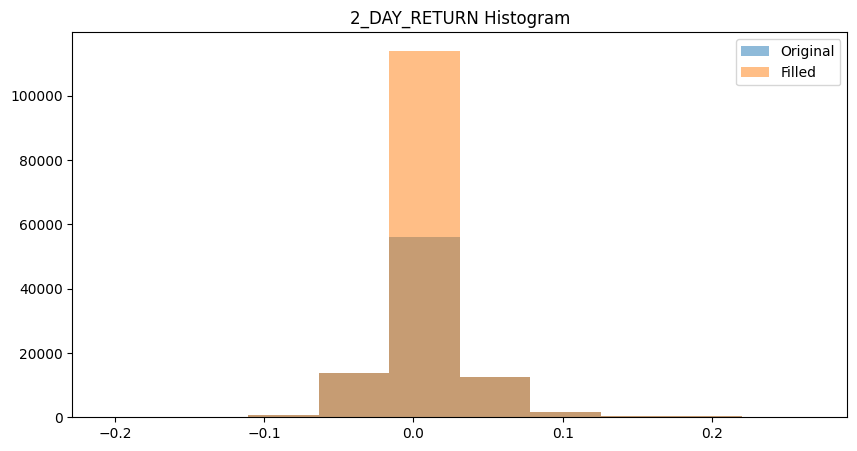

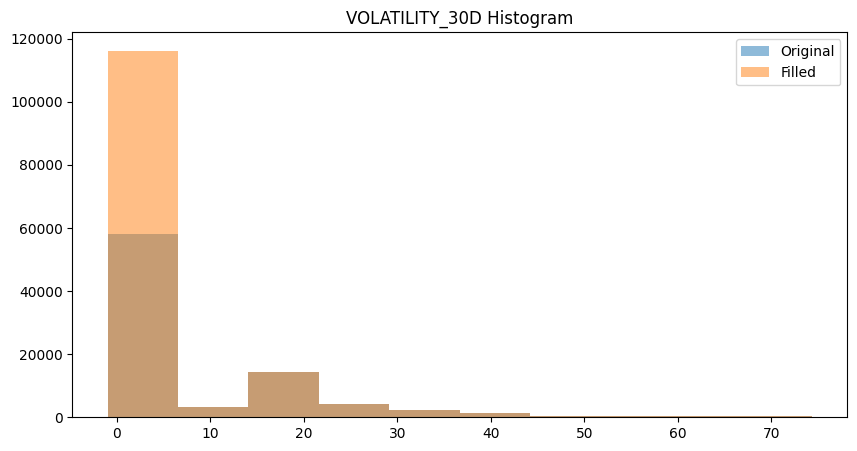

In [638]:
def plot_comparison_histogram_and_boxplot(original_data, filled_data, attribute):
    plt.figure(figsize=(10, 5))
    plt.hist(original_data[attribute], alpha=0.5, label='Original')
    plt.hist(filled_data[attribute], alpha=0.5, label='Filled')
    plt.title(f'{attribute} Histogram')
    plt.legend()

    plt.show()

plot_comparison_histogram_and_boxplot(df, new_df, "2_DAY_RETURN")
plot_comparison_histogram_and_boxplot(df, new_df, "VOLATILITY_30D")

#### 3.3.4 通过数据对象之间的相似性来填补

通过数据对象之间的相似性来填补缺失值策略对缺失值进行处理，在处理后完成，对比新旧数据集的差异。

对于每一条缺失数据，使用KNN算法通过数据对象相似性来填补。

In [639]:
def fill_missing_with_knn(data, missing_attributes, k=5):
    new_data = data.copy()

    new_data = new_data.select_dtypes(include=['float64', 'int64'])
    
    # 对NaN值进行预处理
    new_data.fillna(new_data.mean(), inplace=True) 
    
    sub_list = list(set(missing_attributes) & set(numeric_attributes))
    missing_data = new_data[sub_list]
    
    imputer = KNNImputer(n_neighbors=k)
    filled_data = imputer.fit_transform(missing_data)
    
    filled_df = pd.DataFrame(filled_data, columns=sub_list, index=new_data.index)

    new_data.update(filled_df, overwrite=True)
    
    return new_data

new_df = filled_df = fill_missing_with_knn(df, missing_list)
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


为了更直观的展示结果，此处只显示数值属性处理后的结果。

In [640]:
new_df.head()

,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D
0,229.142895,0.004375,0.007293,5.891352e+06,2.020673e+06,4.094358e+06,11.883457,7.14662
1,0.008379,0.014924,0.014924,-1.262933e-03,3.137196e+06,1.344700e+01,16.992000,1.00000
2,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9.100057e+06,18.769000,16.09900
3,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9.100057e+06,18.769000,16.09900
4,39.780000,0.002011,0.012318,1.231775e-02,5.480141e-02,9.100057e+06,18.769000,16.09900
